# 数据读入模块

In [86]:
import pandas as pd


train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)


## 要读入除了main之外的数在此处添加

In [87]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))


In [88]:
train_data['is_judicial'] = [0 if pd.isna(
    i) else 1 for i in train_data['judicial_reason']]
test_data['is_judicial'] = [0 if pd.isna(
    i) else 1 for i in test_data['judicial_reason']]


In [89]:
train_data['nan_num'] = (train_data == 0).astype(int).sum(axis=1)
test_data['nan_num'] = (test_data == 0).astype(int).sum(axis=1)


In [90]:
if False:

    import pandas as pd
    temp_df = pd.read_csv("./data/detail/df_loan1_b1.csv")

    def chuli_loan(df, colname, ways):
        cust_id = list(set(df['cust_id']))
        res_df = pd.DataFrame({'cust_id': cust_id})
        temp_train = pd.read_csv('./data/df_train.csv')
        temp_test = pd.read_csv('./data/df_test.csv')

        ways_1 = []
        temp = list(temp_test.columns)
        global train_data, test_data

        for i in ways:
            if (colname+'_'+i) not in temp:
                ways_1.append(i)
                res_df[colname+'_'+i] = None
            else:
                print(colname+'_'+i+'已存在')
                train_data = pd.merge(train_data, temp_train[['cust_id', colname+'_'+i]], on="cust_id",
                                      how="left", suffixes=("", "_y"))
                test_data = pd.merge(test_data, temp_test[['cust_id', colname+'_'+i]], on="cust_id",
                                     how="left", suffixes=("", "_y"))
        ways = ways_1
        if len(ways) == 0:
            return res_df
        for i in cust_id:
            cust_df = df[df['cust_id'] == i]
            if 'mean' in ways:
                x = cust_df[colname].mean()
                res_df.loc[i, colname+'_mean'] = x
            if 'sum' in ways:
                x = cust_df[colname].sum()
                res_df.loc[i, colname+'_sum'] = x
            if 'count' in ways:
                x = cust_df[colname].count()
                res_df.loc[i, colname+'_count'] = x
        return res_df

    for colname in ['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']:
        df = chuli_loan(temp_df, colname, ('mean', 'sum', 'count'))
        train_data = pd.merge(train_data, df, on="cust_id",
                              how="left", suffixes=("", "_y"))
        test_data = pd.merge(test_data, df, on="cust_id",
                             how="left", suffixes=("", "_y"))

    df = chuli_loan(temp_df, 'date_3', ('count',))
    train_data = pd.merge(train_data, df, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                         how="left", suffixes=("", "_y"))

    df = chuli_loan(temp_df, 'loan1_10', ('mean',))
    train_data = pd.merge(train_data, df, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                         how="left", suffixes=("", "_y"))

    df = chuli_loan(temp_df, 'loan1_11', ('sum',))
    train_data = pd.merge(train_data, df, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                         how="left", suffixes=("", "_y"))

    df = chuli_loan(temp_df, 'loan1_12', ('sum',))
    train_data = pd.merge(train_data, df, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                         how="left", suffixes=("", "_y"))

    train_data.to_csv('./data/df_train.csv')
    test_data.to_csv('./data/df_test.csv')


## 处理NAN

In [91]:
def delnan(df):
    df = df.dropna(how="all", axis=1)  # 删除全是空值的列
    df = df.fillna(-99)
    return df


In [92]:
df_train = delnan(train_data)
df_test = delnan(test_data)


## 处理-99

In [93]:
# df_train.replace(-99, -1, inplace=True)
# df_test.replace(-99, -1, inplace=True)


## 主成分分析（效果不好）

In [94]:
# from sklearn.decomposition import PCA

# full_col_name = list(df_train.columns)
# pca_col=[i for i in full_col_name if "loan" in i]

# modelPCA=PCA(n_components=0.9)
# temp=modelPCA.fit_transform(df_train[pca_col])
# temp1=modelPCA.transform(df_test[pca_col])
# for i in range(temp.shape[1]):
#     df_train['loan_pca'+str(i)]=temp[:,i]
#     df_test['loan_pca'+str(i)]=temp1[:,i]


## 处理分类变量

In [95]:
type_col = ["basic_1",
            "basic_10",
            "basic_12",
            "basic_14",
            "loan1_16",
            "loan1_20",
            "loan1_23",
            "loan1_25", 
            "loan2_1_y",
            "query_2_y",
            "query_3_y",
            "query_4_y",
            "query_5_y",
            "query_6_y",]


## 转化为one-hot编码（不宜采用）

In [96]:

def to_one_hot(df, colnames):
    df = pd.get_dummies(df, columns=colnames)
    return df


""" df_train = to_one_hot(df_train, type_col)
df_test = to_one_hot(df_test, type_col)
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0
 """


' df_train = to_one_hot(df_train, type_col)\ndf_test = to_one_hot(df_test, type_col)\nfor i in df_train.columns:\n    if i not in df_test.columns:\n        df_test[i] = 0\n '

## 证据权重

In [97]:
import pandas as pd
import numpy as np


def cal_woe(df, df_no_label, x_cols, y_col):
    for i in x_cols:
        x_set = pd.unique(df[i])
        for j in x_set:
            woe = np.mean(df[df[i] == j][y_col])
            df[i].replace(j, woe, inplace=True)
            df_no_label[i].replace(j, woe, inplace=True)
    return df, df_no_label


In [98]:
# df_train, df_test = cal_woe(df_train, df_test, type_col, "label")


In [99]:
full_col_name = list(df_train.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col = [i for i in full_col_name if "judicial" in i]
# loan_pca_col = [i for i in full_col_name if "loan_pca" in i]

""" for i in judicial_col:
    df_train[i].astype("float")
    df_test[i].astype("float") """


' for i in judicial_col:\n    df_train[i].astype("float")\n    df_test[i].astype("float") '

## rank化

In [100]:
def rank(rank_col):
    global df_train, df_test
    df1 = df_train[['cust_id']+rank_col]
    df2 = df_test[['cust_id']+rank_col]
    df = pd.concat([df1, df2], axis=0, ignore_index=True)
    for i in rank_col:
        df[i] = np.argsort(df[i])
        del df_test[i]
        del df_train[i]
    df_train = pd.merge(df_train, df, on="cust_id",
                        how="left", suffixes=("", "_y"))
    df_test = pd.merge(df_test, df, on="cust_id",
                       how="left", suffixes=("", "_y"))


a = ['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']
b = ['_sum', '_mean']
c = []
for i in a:
    for j in b:
        c.append(i+j)
# rank(c)


## 归一化

In [101]:
def norm(rank_col):
    global df_train, df_test
    df1 = df_train[['cust_id']+rank_col]
    df2 = df_test[['cust_id']+rank_col]
    df = pd.concat([df1, df2], axis=0, ignore_index=True)
    for i in rank_col:
        df[i] = (df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))
        del df_test[i]
        del df_train[i]
    df_train = pd.merge(df_train, df, on="cust_id",
                        how="left", suffixes=("", "_y"))
    df_test = pd.merge(df_test, df, on="cust_id",
                       how="left", suffixes=("", "_y"))


a = ['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']
b = ['_sum', '_mean']
c = []
for i in a:
    for j in b:
        c.append(i+j)
# norm(c)


## 标准化

In [102]:
def stand(rank_col):
    global df_train, df_test
    df1 = df_train[['cust_id']+rank_col]
    df2 = df_test[['cust_id']+rank_col]
    df = pd.concat([df1, df2], axis=0, ignore_index=True)
    for i in rank_col:
        df[i] = (df[i]-np.mean(df[i], axis=0))/np.std(df[i], axis=0)
        del df_test[i]
        del df_train[i]
    df_train = pd.merge(df_train, df, on="cust_id",
                        how="left", suffixes=("", "_y"))
    df_test = pd.merge(df_test, df, on="cust_id",
                       how="left", suffixes=("", "_y"))


a = ['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']
b = ['_sum', '_mean']
c = []
for i in a:
    for j in b:
        c.append(i+j)
# stand(c)


## 设置哪些x作为模型自变量输入

In [103]:
x_col = basic_col+['is_judicial']+loan_col+query_col+overdue_col+['nan_num']
print('自变量个数为',len(x_col))


自变量个数为 116


In [104]:
df_test.to_csv("test_input.csv",encoding='utf-8')
df_train.to_csv("train_input.csv",encoding='utf-8')

# 训练模型

## 超参数

In [105]:
N = 1000
num_round = 100
local_test_size = 3000

max_depth = [3, 4, 5, 6, 7, 8]
eta = [0.1, 0.06]
colsample_bytree = [0.8, 0.7, 0.6, 0.5]
scale_pos_weight = [1, 3, 6, 10, 20, 30]
test_size = [0.3, 0.5, 0.7]
subsample = [0.7, 0.6, 0.5, 0.4]
par_lambda = [1, 1.5, 2, 3]
alpha = [0, 0.2, 0.4, 0.6, 0.8]
min_child_weight = [1, 2, 3, 4, 5, 6, 10]
gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5]


### train划分为
* 本地测试集（固定）d_localtest
* 训练集（固定）
  * 评估集（每次的模型不同）dtest
  * 真正的训练集（每次的模型不同）dtrain

In [106]:
import copy
import xgboost as xgb
import random
from sklearn import model_selection
from sklearn.metrics import roc_auc_score


pred_labels = []
local_test_labels = []
loss_seq = []
max_auc_loss = 0
flag = 0
important_x_seq = []

num_seq = list(range(len(df_train)))
np.random.shuffle(num_seq)

d_full = xgb.DMatrix(df_train[x_col], label=df_train['label'])

X_local_test = df_train[x_col].iloc[num_seq[0:local_test_size]]
Y_local_test = df_train["label"].iloc[num_seq[0:local_test_size]]

d_localtest = xgb.DMatrix(X_local_test, label=Y_local_test)

X = df_train[x_col].iloc[num_seq[local_test_size:len(df_train)]]
Y = df_train['label'].iloc[num_seq[local_test_size:len(df_train)]]
x_perd = xgb.DMatrix(df_test[x_col])


In [107]:
for i in range(N):

    #seed = 666
    test_size_this_round = random.choice(test_size)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, Y, test_size=test_size_this_round)
    # seed+=1

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval')]

    param = {
        'max_depth': random.choice(max_depth),
        'eta': random.choice(eta),
        'colsample_bytree': random.choice(colsample_bytree),
        'objective': 'binary:logistic',
        # 'verbosity':0,
        'scale_pos_weight': random.choice(scale_pos_weight),
        'eval_metric': 'auc',
        'subsample': random.choice(subsample),
        'alpha': random.choice(alpha),
        'lambda': random.choice(par_lambda),
        'min_child_weight': random.choice(min_child_weight),
        'gamma': random.choice(gamma),
        # 'seed': 666,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        # "enable_enable_categorical":True,
    }

    bst = xgb.train(param, dtrain, num_round, evals=evallist,
                    early_stopping_rounds=10, verbose_eval=False)

    loss = float(bst.eval(dtest).split(":")[1])
    train_loss = float(bst.eval(dtrain).split(":")[1])
    local_test_loss = float(bst.eval(d_localtest).split(":")[1])
    global_auc = float(bst.eval(d_full).split(":")[1])

    pred_label = list(bst.predict(x_perd))
    test_label = list(bst.predict(xgb.DMatrix(X_local_test)))
    # temp=roc_auc_score(y_test,test_label)
    # print(test_label[0:10])

    temp_dict = {"test_auc": loss, "train_auc": train_loss,
                 'local_test_auc': local_test_loss, 'test_size': test_size_this_round,
                 'global_auc': global_auc}
    temp_dict.update(param)

    # info_df=info_df.append(pd.DataFrame(temp_dict))
    if flag == 0:
        info_df = pd.DataFrame(temp_dict, index=[i])
        flag = 1
    else:
        info_df = pd.concat([info_df, pd.DataFrame(temp_dict, index=[i])])

    if loss > max_auc_loss:
        best_bst = copy.deepcopy(bst)
        max_auc_loss = loss

    if False:
        pic = xgb.plot_importance(bst, max_num_features=50)
        temp = pic.get_ymajorticklabels()
        important_x = [str(i).split("\'")[1] for i in temp]
        important_x.reverse()
        important_x_seq += important_x

    print(i+1, ":", loss, sep="")
    # print(param)
    # print("-------------------------")
    pred_labels.append([j for j in pred_label])
    local_test_labels.append(copy.deepcopy(test_label))


print('最大AUC:', max(info_df['local_test_auc']), sep="")


1:0.6908301977009254
2:0.6841483951921807
3:0.6971807969786472
4:0.6979048247799241
5:0.7014960344905598
6:0.7016582825380462
7:0.6768645192913451
8:0.6832116117990793
9:0.6824539519276361
10:0.7122865507116606
11:0.6890650314203768
12:0.649147056680396
13:0.704702505195829
14:0.7012885843709402
15:0.6763831716261384
16:0.7002674714247142
17:0.7011691266111165
18:0.6953292147544005
19:0.7138628733859791
20:0.7362356291917149
21:0.6971097665095215
22:0.6825504510013759
23:0.7516883237537554
24:0.7043907621703742
25:0.7142438462003037
26:0.7036032697885737
27:0.705929253601454
28:0.7077145041308726
29:0.729865917478684
30:0.6950375924237585
31:0.6740298851243077
32:0.735992337164751
33:0.7144876117581762
34:0.7386703473659996
35:0.705454647744694
36:0.7129891152544968
37:0.7498996552863956
38:0.650200961913142
39:0.7099622417377286
40:0.6987577639751553
41:0.6971570375030582
42:0.676283506057558
43:0.6885509409339229
44:0.6923348473026969
45:0.6704319635023047
46:0.671598909442297
47:0.7

In [108]:
info_df


,test_auc,train_auc,local_test_auc,test_size,global_auc,max_depth,eta,colsample_bytree,objective,scale_pos_weight,eval_metric,subsample,alpha,lambda,min_child_weight,gamma,tree_method,gpu_id
0,0.690830,0.847829,0.679640,0.3,0.781046,6,0.06,0.7,binary:logistic,1,auc,0.6,0.0,1.0,4,0.5,gpu_hist,0
1,0.684148,0.973180,0.745871,0.5,0.810455,5,0.06,0.5,binary:logistic,6,auc,0.7,0.2,1.0,1,0.4,gpu_hist,0
2,0.697181,0.994974,0.684938,0.3,0.873176,8,0.10,0.7,binary:logistic,6,auc,0.7,0.4,3.0,4,0.3,gpu_hist,0
3,0.697905,0.945150,0.677450,0.3,0.840596,6,0.10,0.5,binary:logistic,20,auc,0.7,0.2,1.0,10,0.2,gpu_hist,0
4,0.701496,0.996855,0.728438,0.3,0.886533,7,0.10,0.7,binary:logistic,10,auc,0.7,0.0,1.5,1,0.5,gpu_hist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.663873,0.966424,0.681415,0.7,0.740671,5,0.10,0.8,binary:logistic,30,auc,0.4,0.8,1.0,5,0.5,gpu_hist,0
996,0.695189,0.998709,0.628502,0.5,0.805423,8,0.10,0.7,binary:logistic,6,auc,0.4,0.2,3.0,5,0.2,gpu_hist,0
997,0.714499,0.999537,0.723000,0.5,0.845695,8,0.10,0.5,binary:logistic,6,auc,0.7,0.6,3.0,5,0.2,gpu_hist,0
998,0.704297,0.981379,0.692521,0.7,0.775832,5,0.06,0.8,binary:logistic,1,auc,0.4,0.2,1.0,1,0.5,gpu_hist,0


In [109]:
info_df.to_csv("info.csv", encoding="utf-8", index=False)


In [110]:
# pic = xgb.plot_importance(best_bst, max_num_features=50)
# temp = pic.get_ymajorticklabels()
# important_x = [str(i).split("\'")[1] for i in temp]
# important_x.reverse()


In [111]:
# important_x


In [112]:
# pd.value_counts(important_x_seq)


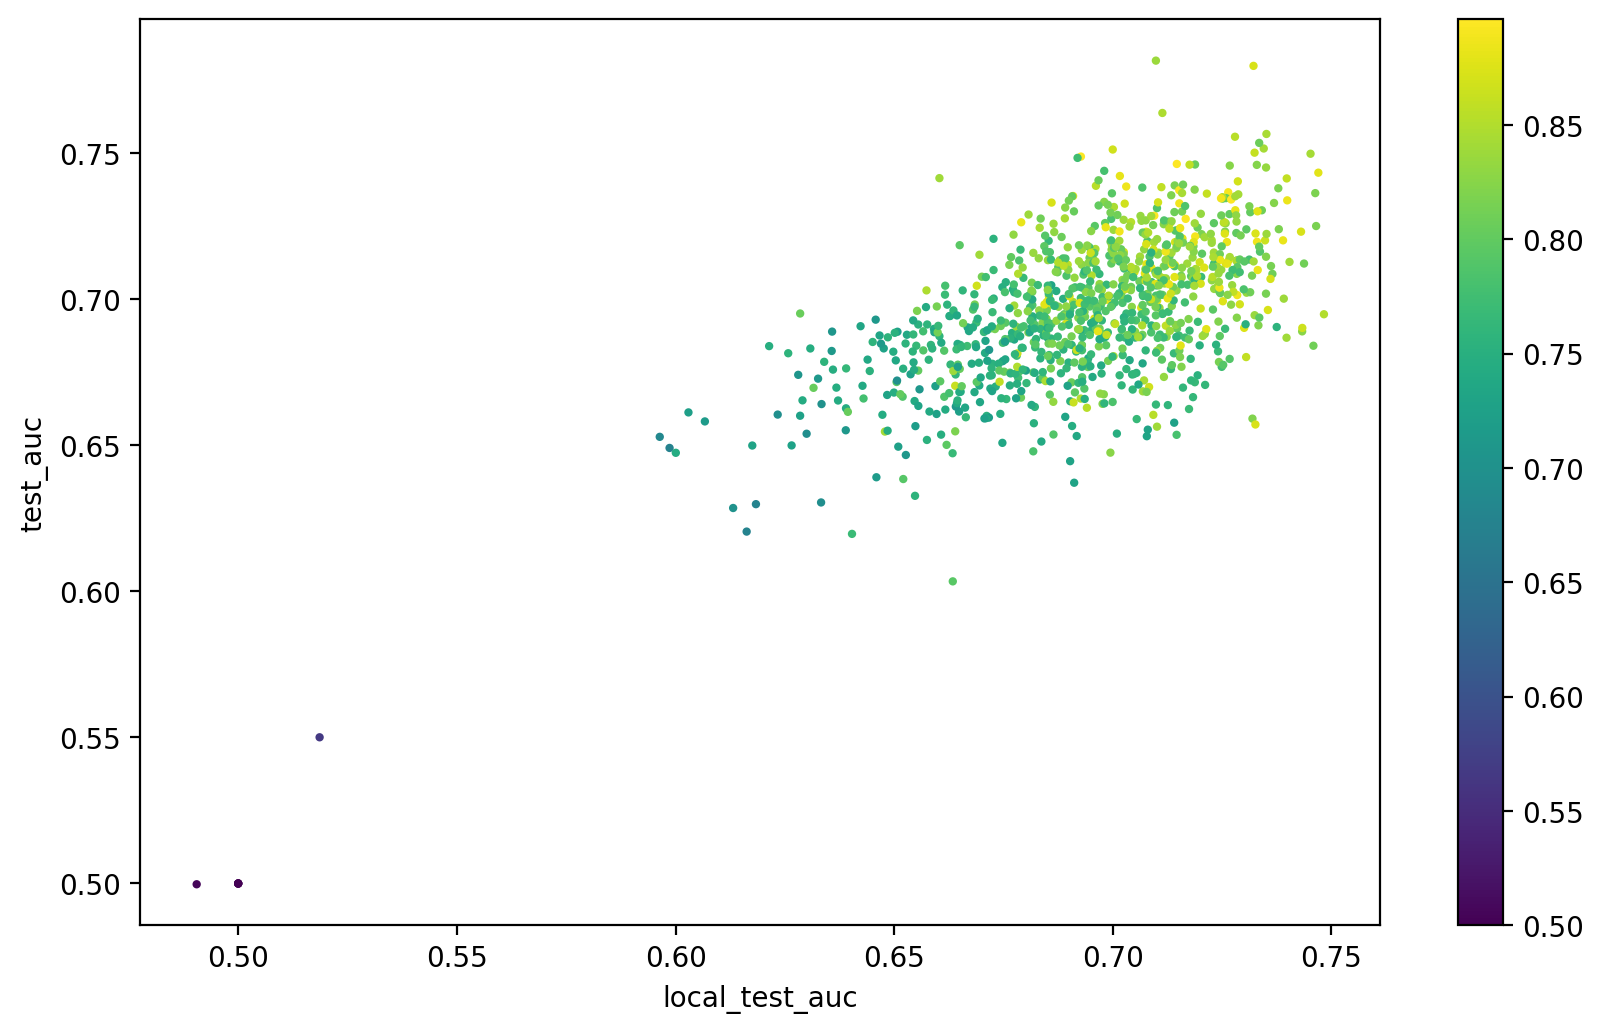

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(info_df['local_test_auc'], info_df['test_auc'],
            c=info_df['global_auc'], s=4)
plt.xlabel('local_test_auc')
plt.ylabel('test_auc')
plt.colorbar()


# 输出模块

In [116]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score

date = time.strftime("%Y%m%d-%H%M%S", time.localtime())
res_num = np.argsort([-i for i in info_df['local_test_auc']])

# 选择前n个结果进行平均（手动指定or在本地测试集排序选出）
if True:
    max_auc = -1
    list_temp = []
    auc_seq = []
    for i in range(N):
        list_temp.append(local_test_labels[res_num[i]])
        # 算数平均
        # temp = np.mean(list_temp, axis=0)
        # 几何平均(better)
        temp = np.exp(np.mean(np.log(list_temp), axis=0))
        temp_auc = roc_auc_score(Y_local_test, temp)
        print(i, temp_auc)
        auc_seq.append(temp_auc)
        if temp_auc > max_auc:
            max_auc = temp_auc
            n = i+1
else:
    n = 40
    n = min(N, n)

res_num = res_num[0:n]

#final_pred_label = np.mean([pred_labels[i] for i in res_num], axis=0)
final_pred_label = np.exp(
    np.mean(np.log([pred_labels[i] for i in res_num]), axis=0))
#local_auc = roc_auc_score(y_test, final_pred_label)
print("本地测试集前", n, "个auc为", [
      list(info_df['local_test_auc'])[i] for i in res_num], sep="")
print("平均之后local_test_AUC为", max_auc, sep="")

res = pd.DataFrame({
    'cust_id': list(df_test["cust_id"]),
    'label': final_pred_label,
})
res.to_csv("./output/result"+date+".csv", encoding="utf-8", index=False)


0 0.7482786413356362
1 0.7571247635496341
2 0.7635266058063985
3 0.7640727033473148
4 0.7675466732461551
5 0.7677572168763879
6 0.7672538860103626
7 0.76740192450037
8 0.7714219919401266
9 0.7716654330125834
10 0.7738004770129122
11 0.77313594867999
12 0.7722707459495024
13 0.7748729336294102
14 0.7750209721194177
15 0.7757841927790113
16 0.7754617978452176
17 0.7753367875647669
18 0.775849987663459
19 0.7751690106094251
20 0.7745571181840611
21 0.7748597746525208
22 0.7747660169421826
23 0.7752940208898758
24 0.7757183978945636
25 0.7751295336787565
26 0.7746064643473971
27 0.7743301258327165
28 0.7743531540422731
29 0.7738893001069167
30 0.7735833538942347
31 0.7728300024673082
32 0.7729977794226498
33 0.7731984538202155
34 0.7727543383501934
35 0.7732379307508841
36 0.7732938564026647
37 0.7732181922855499
38 0.7729550127477589
39 0.7728267127230857
40 0.7727872357924171
41 0.772412204951065
42 0.7731556871453246
43 0.7736787564766839
44 0.7732839871699976
45 0.7739847026893659
46 0

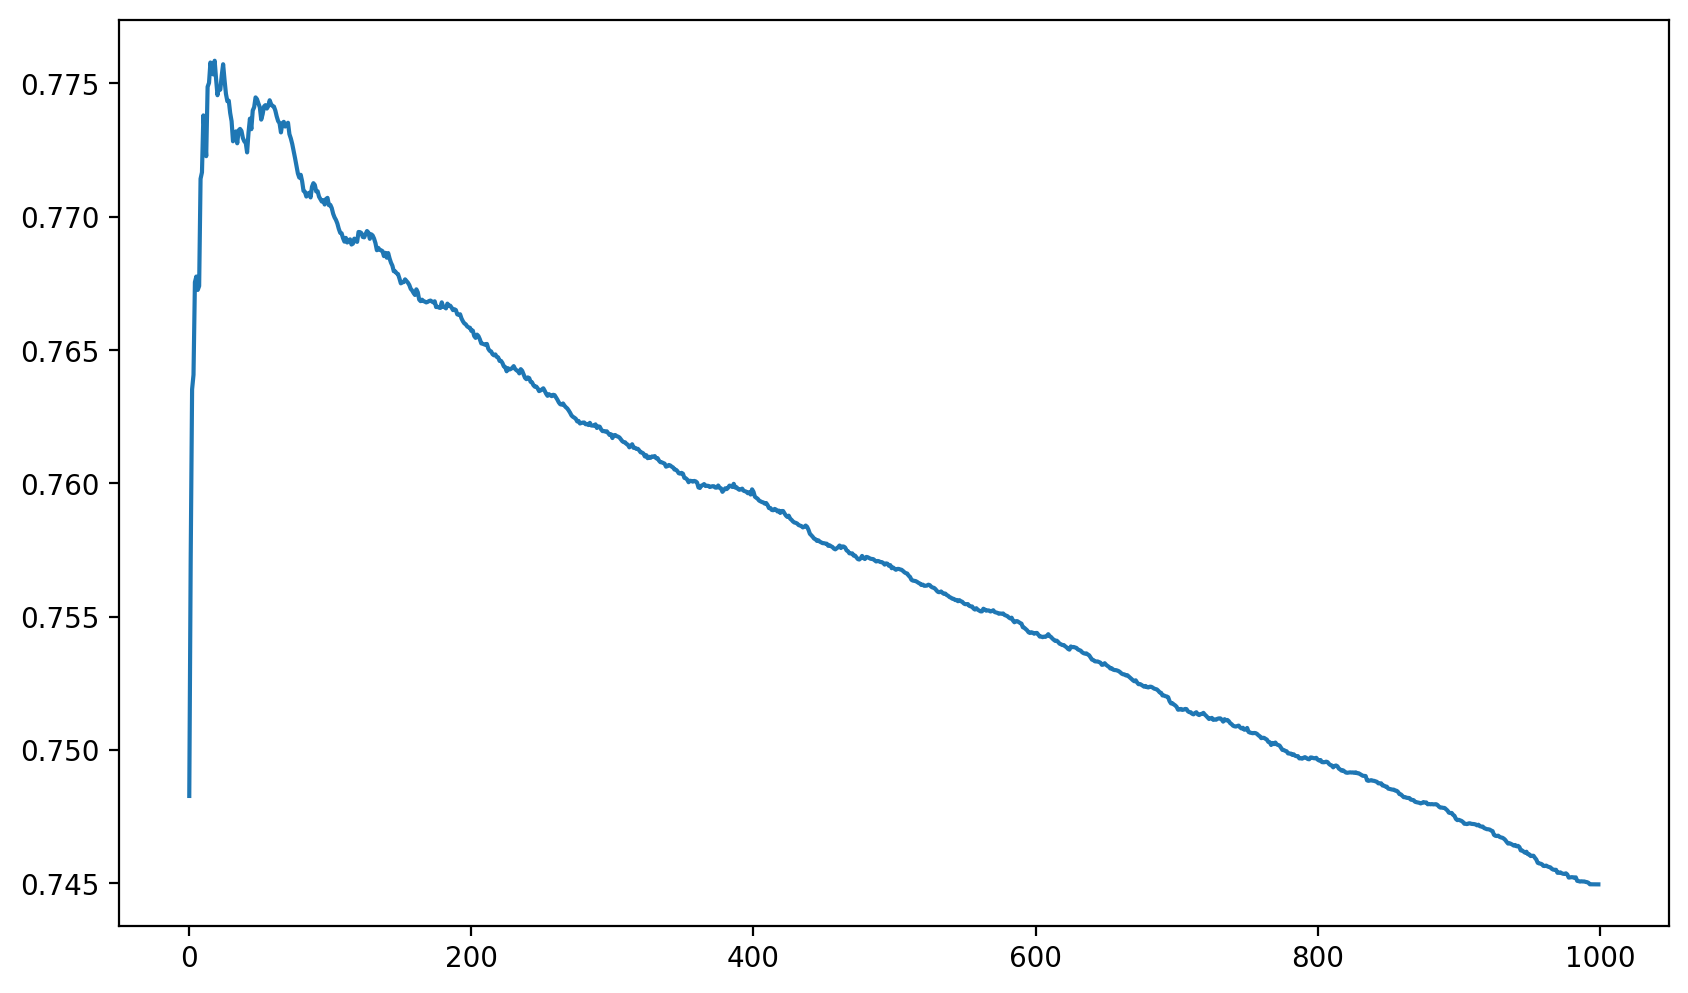

In [115]:

plt.figure(figsize=(10, 6), dpi=200)
plt.plot(list(range(N)), auc_seq)


# 一些tips

* 提升n有一定提升(如何确定n？)
  * n=40 0.6763
  * n=10 0.6728
  * n=100 0.6774
  * 太大也不好

# 一些进展

* 随机参数
* XGB模型
* 本地测试集auc较高（0.75+）
* 部分类型变量进行了one-hot处理
* 把细分表除了loan与主表合并

# tbd

* 处理细分表的loan，给出指标
* 确定变量类型，以便对所有（or重要）分类变量进行one-hot处理
* 新模型？

## 10-12
* 0.6824（这次我留了代码\doge）
* 把-99变为-1，本地有提升
* 划出了一个本地测试集
  * 本地测试集（固定）d_localtest
  * 训练集（固定）
    * 评估集（每次的模型不同）dtest
    * 真正的训练集（每次的模型不同）dtrain
* 添加参数nan_num（然并卵）
* tbd
  * 找特征
  * 加x
  * 分析一下参数作用